In [1]:
##Import libraries##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
##Input data##

df = pd.read_csv('data_stocks.csv')
df1 = df.copy()
print(df.shape)
df.head()

(41266, 502)


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
##Feature scaling##

from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)
print('Shape of Scaled features : ')
print(X_scaled.shape)

Shape of Scaled features : 
(41266, 502)


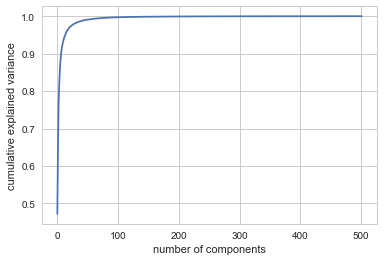

In [4]:
#Determining optimal number of components for PCA looking at the explained variance 
#as a function of the components

sns.set()
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations

In [5]:
##Convert to 2Dimensions using PCA##

pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print(pca.explained_variance_)
print('PCA Components : ')
print(pca.components_)
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print(X_transformed[:5,:])
print('Transformed Feature shape :')
print(X_transformed.shape)
print('Original Feature shape :')
print(X_scaled.shape)
print('Restransformed Feature shape :')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('Retransformed Feature values first five rows :')
print(X_retransformed[:5,:])

explained variance :
[237.01475857  86.20695296]
PCA Components : 
[[-0.0641156  -0.06100625 -0.03912755 ... -0.06222908  0.00249839
  -0.05149673]
 [ 0.01345954 -0.01783581 -0.06428133 ... -0.02036739 -0.08124665
  -0.05945237]]
Transformed Feature values first five rows :
[[25.64715405  9.99154156]
 [25.74447983  9.87809253]
 [25.66169481  9.81134664]
 [25.76412613  9.97993834]
 [25.67551977  9.86346559]]
Transformed Feature shape :
(41266, 2)
Original Feature shape :
(41266, 502)
Restransformed Feature shape :
(41266, 502)
Retransformed Feature values first five rows :
[[-1.50990118 -1.74284403 -1.64577982 ... -1.7995004  -0.74770277
  -1.91476551]
 [-1.51766825 -1.74675806 -1.64229528 ... -1.80324623 -0.73824226
  -1.91303266]
 [-1.51325881 -1.74051719 -1.63476559 ... -1.79673515 -0.7330262
  -1.9048013 ]
 [-1.51755709 -1.74977311 -1.64961078 ... -1.80654313 -0.7464678
  -1.92009935]
 [-1.51344371 -1.74229018 -1.63865681 ... -1.798657   -0.73722615
  -1.90861183]]


Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

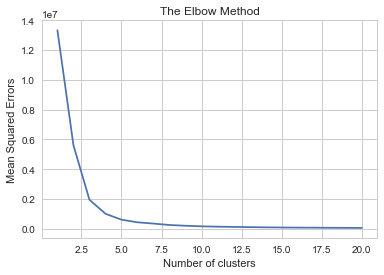

In [6]:
##Number of clusters for KMeans##

wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

In [7]:
#Optimum number of cluster from the elbow method is determined to be 5
#Applying K-Means Clustering to find stocks which are similar in performance

k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_
print("labels generated :\n",labels)
print('label lengths: \n',len(labels))

labels generated :
 [3 3 3 ... 2 2 2]
label lengths: 
 41266


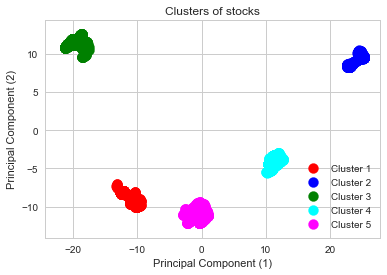

In [8]:
##Visualization##

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

The above 5 clusters shows the stocks which are similar in stock performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [9]:
df_comp = pd.DataFrame(pca.components_,columns=df1.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452


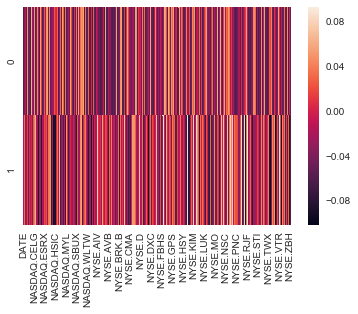

In [10]:
sns.set_style('whitegrid')
sns.heatmap(df_comp)

Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [11]:
df['labels'] = labels
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,3
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,3
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,3
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,3
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,3


In [12]:
df['labels'].unique().tolist()
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 3 the number of similar stock performances is : 5872 

For lablel 0 the number of similar stock performances is : 8627 

For lablel 4 the number of similar stock performances is : 11161 

For lablel 1 the number of similar stock performances is : 5868 

For lablel 2 the number of similar stock performances is : 9738 


In [13]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import SpectralClustering
hc = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors')
hc.fit(X_transformed)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

In [14]:
hc.fit_predict(X_transformed)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, ..., 1, 1, 1])

In [15]:
y_labels = hc.labels_
len(y_labels),np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

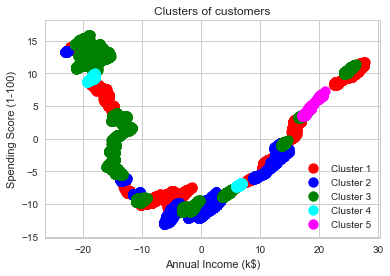

In [16]:
# Visualising the clusters
X = X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
df1.columns
df2 = df1.copy()
df2['labels'] = y_labels
for i in df2['labels'].unique().tolist():
    count = df2[df2['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 0 the number of similar stock performances is : 14215 

For lablel 2 the number of similar stock performances is : 14060 

For lablel 4 the number of similar stock performances is : 897 

For lablel 1 the number of similar stock performances is : 11632 

For lablel 3 the number of similar stock performances is : 462 


For the given data set KMeans Clustering creates a better and distinct clustering compared to Spectral Clustering.